In [2]:
# Load some important tools;

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [47]:
df= pd.read_csv("takehome_user_engagement.csv")
df.head(20)


,time_stamp,user_id,visited
0,2014-04-22 03:53:30,1,1
1,2013-11-15 03:45:04,2,1
2,2013-11-29 03:45:04,2,1
3,2013-12-09 03:45:04,2,1
4,2013-12-25 03:45:04,2,1
5,2013-12-31 03:45:04,2,1
6,2014-01-08 03:45:04,2,1
7,2014-02-03 03:45:04,2,1
8,2014-02-08 03:45:04,2,1
9,2014-02-09 03:45:04,2,1


In [55]:
df.info()  # will need to change timestamp to date

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 207917 entries, 2014-04-22 03:53:30 to 2014-01-26 08:57:12
Data columns (total 3 columns):
 #   Column      Non-Null Count   Dtype 
---  ------      --------------   ----- 
 0   time_stamp  207917 non-null  object
 1   user_id     207917 non-null  int64 
 2   visited     207917 non-null  int64 
dtypes: int64(2), object(1)
memory usage: 6.3+ MB


In [53]:
df.describe()

,user_id,visited
count,207917.000000,207917.0
mean,5913.314197,1.0
std,3394.941674,0.0
min,1.000000,1.0
25%,3087.000000,1.0
50%,5682.000000,1.0
75%,8944.000000,1.0
max,12000.000000,1.0


In [52]:
df['time_stamp_index'] = pd.to_datetime(df['time_stamp'])
df = df.set_index('time_stamp_index')


In [97]:
df.columns

Index(['time_stamp', 'user_id', 'visited'], dtype='object')

In [68]:
df = df.sort_index()


#df['perWeek'] = df.groupby('time_stamp_index').resample('W').sum('visited').fillna(0).groupby('user_id').rolling(1, min_periods=7).sum()

In [198]:
_grouped = df.groupby('user_id').rolling('7D').count()
_grouped.head(30)

user_id  visited
user_id time_stamp_index                     
1       2014-04-22 03:53:30      1.0      1.0
2       2013-11-15 03:45:04      1.0      1.0
        2013-11-29 03:45:04      1.0      1.0
        2013-12-09 03:45:04      1.0      1.0
        2013-12-25 03:45:04      1.0      1.0
        2013-12-31 03:45:04      2.0      2.0
        2014-01-08 03:45:04      1.0      1.0
        2014-02-03 03:45:04      1.0      1.0
        2014-02-08 03:45:04      2.0      2.0
        2014-02-09 03:45:04      3.0      3.0
        2014-02-13 03:45:04      3.0      3.0
        2014-02-16 03:45:04      2.0      2.0
        2014-03-09 03:45:04      1.0      1.0
        2014-03-13 03:45:04      2.0      2.0
        2014-03-31 03:45:04      1.0      1.0
3       2013-03-19 23:14:52      1.0      1.0
4       2013-05-22 08:09:28      1.0      1.0
5       2013-01-22 10:14:20      1.0      1.0
6       2013-12-19 03:37:06      1.0      1.0
7       2012-12-20 13:24:32      1.0      1.0
10      2013-01-16 22:08:03      1.0      1.0
        2013-01-22 22:08:03      2.0      2.0
        2013-01-30 22:08:03      1.0      1.0
        2013-02-04 22:08:03      2.0      2.0
        2013-02-06 22:08:03      2.0      2.0
        2013-02-14 22:08:03      1.0      1.0
        2013-02-17 22:08:03      2.0      2.0
        2013-02-19 22:08:03      3.0      3.0
        2013-02-26 22:08:03      1.0      1.0
        2013-03-01 22:08:03      2.0      2.0

In [200]:
_grouped.rename(columns={'user_id':'users'}, inplace=True)
_grouped.reset_index(level=0, inplace=True)

In [204]:
_grouped.head(25)

,user_id,users,visited,engaged
time_stamp_index,,,,
2014-04-22 03:53:30,1,1.0,1.0,False
2013-11-15 03:45:04,2,1.0,1.0,False
2013-11-29 03:45:04,2,1.0,1.0,False
2013-12-09 03:45:04,2,1.0,1.0,False
2013-12-25 03:45:04,2,1.0,1.0,False
2013-12-31 03:45:04,2,2.0,2.0,False
2014-01-08 03:45:04,2,1.0,1.0,False
2014-02-03 03:45:04,2,1.0,1.0,False
2014-02-08 03:45:04,2,2.0,2.0,False


In [210]:
#_grouped.reset_index()
_grouped = _grouped.groupby(['user_id'], as_index=False)['visited'].max()

In [211]:
_grouped.head(30)

,user_id,visited
0,1,1.0
1,2,3.0
2,3,1.0
3,4,1.0
4,5,1.0
5,6,1.0
6,7,1.0
7,10,7.0
8,11,1.0
9,13,1.0


In [214]:
_adopted = _grouped.visited >= 3

In [216]:
_adopted.head(15)




0     False
1      True
2     False
3     False
4     False
5     False
6     False
7      True
8     False
9     False
10    False
11    False
12    False
13     True
14    False
Name: visited, dtype: bool

In [212]:
df_users = pd.read_csv("takehome_users.csv", encoding = 'ISO-8859-1')
df_users.head(10)

,object_id,creation_time,name,email,creation_source,last_session_creation_time,opted_in_to_mailing_list,enabled_for_marketing_drip,org_id,invited_by_user_id
0,1,2014-04-22 03:53:30,Clausen August,AugustCClausen@yahoo.com,GUEST_INVITE,1.398139e+09,1,0,11,10803.0
1,2,2013-11-15 03:45:04,Poole Matthew,MatthewPoole@gustr.com,ORG_INVITE,1.396238e+09,0,0,1,316.0
2,3,2013-03-19 23:14:52,Bottrill Mitchell,MitchellBottrill@gustr.com,ORG_INVITE,1.363735e+09,0,0,94,1525.0
3,4,2013-05-21 08:09:28,Clausen Nicklas,NicklasSClausen@yahoo.com,GUEST_INVITE,1.369210e+09,0,0,1,5151.0
4,5,2013-01-17 10:14:20,Raw Grace,GraceRaw@yahoo.com,GUEST_INVITE,1.358850e+09,0,0,193,5240.0
5,6,2013-12-17 03:37:06,Cunha Eduardo,EduardoPereiraCunha@yahoo.com,GUEST_INVITE,1.387424e+09,0,0,197,11241.0
6,7,2012-12-16 13:24:32,Sewell Tyler,TylerSewell@jourrapide.com,SIGNUP,1.356010e+09,0,1,37,NaN
7,8,2013-07-31 05:34:02,Hamilton Danielle,DanielleHamilton@yahoo.com,PERSONAL_PROJECTS,NaN,1,1,74,NaN
8,9,2013-11-05 04:04:24,Amsel Paul,PaulAmsel@hotmail.com,PERSONAL_PROJECTS,NaN,0,0,302,NaN
9,10,2013-01-16 22:08:03,Santos Carla,CarlaFerreiraSantos@gustr.com,ORG_INVITE,1.401833e+09,1,1,318,4143.0


In [227]:
df_users.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12000 entries, 0 to 11999
Data columns (total 11 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   object_id                   12000 non-null  int64  
 1   creation_time               12000 non-null  object 
 2   name                        12000 non-null  object 
 3   email                       12000 non-null  object 
 4   creation_source             12000 non-null  object 
 5   last_session_creation_time  12000 non-null  float64
 6   opted_in_to_mailing_list    12000 non-null  int64  
 7   enabled_for_marketing_drip  12000 non-null  int64  
 8   org_id                      12000 non-null  int64  
 9   invited_by_user_id          12000 non-null  float64
 10  adopted                     12000 non-null  int32  
dtypes: float64(2), int32(1), int64(4), object(4)
memory usage: 984.5+ KB


Probably need to identify the adopted users to the actual traffic to evaluate strength of patterns from activity to adopted users.

In [219]:
df_users['adopted'] = _adopted
df_users['adopted'] = df_users['adopted'].fillna(0).astype(int)

In [225]:


df_users.head(10)

,object_id,creation_time,name,email,creation_source,last_session_creation_time,opted_in_to_mailing_list,enabled_for_marketing_drip,org_id,invited_by_user_id,adopted
0,1,2014-04-22 03:53:30,Clausen August,AugustCClausen@yahoo.com,GUEST_INVITE,1.398139e+09,1,0,11,10803.0,0
1,2,2013-11-15 03:45:04,Poole Matthew,MatthewPoole@gustr.com,ORG_INVITE,1.396238e+09,0,0,1,316.0,1
2,3,2013-03-19 23:14:52,Bottrill Mitchell,MitchellBottrill@gustr.com,ORG_INVITE,1.363735e+09,0,0,94,1525.0,0
3,4,2013-05-21 08:09:28,Clausen Nicklas,NicklasSClausen@yahoo.com,GUEST_INVITE,1.369210e+09,0,0,1,5151.0,0
4,5,2013-01-17 10:14:20,Raw Grace,GraceRaw@yahoo.com,GUEST_INVITE,1.358850e+09,0,0,193,5240.0,0
5,6,2013-12-17 03:37:06,Cunha Eduardo,EduardoPereiraCunha@yahoo.com,GUEST_INVITE,1.387424e+09,0,0,197,11241.0,0
6,7,2012-12-16 13:24:32,Sewell Tyler,TylerSewell@jourrapide.com,SIGNUP,1.356010e+09,0,1,37,0.0,0
7,8,2013-07-31 05:34:02,Hamilton Danielle,DanielleHamilton@yahoo.com,PERSONAL_PROJECTS,NaN,1,1,74,0.0,1
8,9,2013-11-05 04:04:24,Amsel Paul,PaulAmsel@hotmail.com,PERSONAL_PROJECTS,NaN,0,0,302,0.0,0
9,10,2013-01-16 22:08:03,Santos Carla,CarlaFerreiraSantos@gustr.com,ORG_INVITE,1.401833e+09,1,1,318,4143.0,0


In [226]:
df_users.invited_by_user_id = df_users.invited_by_user_id.fillna(0)
df_users.last_session_creation_time = df_users.last_session_creation_time.fillna(0)

In [234]:
df_users = pd.get_dummies(df_users, columns = ['creation_source'])

In [235]:
df_users.head(10)

,object_id,creation_time,name,email,last_session_creation_time,opted_in_to_mailing_list,enabled_for_marketing_drip,org_id,invited_by_user_id,adopted,creation_source_GUEST_INVITE,creation_source_ORG_INVITE,creation_source_PERSONAL_PROJECTS,creation_source_SIGNUP,creation_source_SIGNUP_GOOGLE_AUTH
0,1,2014-04-22 03:53:30,Clausen August,AugustCClausen@yahoo.com,1.398139e+09,1,0,11,10803.0,0,1,0,0,0,0
1,2,2013-11-15 03:45:04,Poole Matthew,MatthewPoole@gustr.com,1.396238e+09,0,0,1,316.0,1,0,1,0,0,0
2,3,2013-03-19 23:14:52,Bottrill Mitchell,MitchellBottrill@gustr.com,1.363735e+09,0,0,94,1525.0,0,0,1,0,0,0
3,4,2013-05-21 08:09:28,Clausen Nicklas,NicklasSClausen@yahoo.com,1.369210e+09,0,0,1,5151.0,0,1,0,0,0,0
4,5,2013-01-17 10:14:20,Raw Grace,GraceRaw@yahoo.com,1.358850e+09,0,0,193,5240.0,0,1,0,0,0,0
5,6,2013-12-17 03:37:06,Cunha Eduardo,EduardoPereiraCunha@yahoo.com,1.387424e+09,0,0,197,11241.0,0,1,0,0,0,0
6,7,2012-12-16 13:24:32,Sewell Tyler,TylerSewell@jourrapide.com,1.356010e+09,0,1,37,0.0,0,0,0,0,1,0
7,8,2013-07-31 05:34:02,Hamilton Danielle,DanielleHamilton@yahoo.com,0.000000e+00,1,1,74,0.0,1,0,0,1,0,0
8,9,2013-11-05 04:04:24,Amsel Paul,PaulAmsel@hotmail.com,0.000000e+00,0,0,302,0.0,0,0,0,1,0,0
9,10,2013-01-16 22:08:03,Santos Carla,CarlaFerreiraSantos@gustr.com,1.401833e+09,1,1,318,4143.0,0,0,1,0,0,0


In [236]:
corr = df_users.corr()
#plot it in the next line
corr.round(2).style.background_gradient(cmap='coolwarm')

,object_id,last_session_creation_time,opted_in_to_mailing_list,enabled_for_marketing_drip,org_id,invited_by_user_id,adopted,creation_source_GUEST_INVITE,creation_source_ORG_INVITE,creation_source_PERSONAL_PROJECTS,creation_source_SIGNUP,creation_source_SIGNUP_GOOGLE_AUTH
object_id,1.000000,0.010000,-0.030000,-0.020000,0.000000,0.000000,-0.180000,-0.010000,-0.000000,-0.000000,0.000000,0.020000
last_session_creation_time,0.010000,1.000000,0.010000,0.010000,0.010000,0.020000,-0.010000,-0.000000,0.020000,-0.390000,0.180000,0.220000
opted_in_to_mailing_list,-0.030000,0.010000,1.000000,0.480000,0.000000,0.010000,0.020000,0.000000,0.010000,-0.010000,0.000000,-0.000000
enabled_for_marketing_drip,-0.020000,0.010000,0.480000,1.000000,0.010000,0.000000,0.010000,-0.000000,0.000000,-0.010000,0.000000,0.000000
org_id,0.000000,0.010000,0.000000,0.010000,1.000000,-0.040000,0.010000,-0.000000,-0.020000,0.010000,0.020000,-0.000000
invited_by_user_id,0.000000,0.020000,0.010000,0.000000,-0.040000,1.000000,-0.010000,0.330000,0.540000,-0.380000,-0.380000,-0.300000
adopted,-0.180000,-0.010000,0.020000,0.010000,0.010000,-0.010000,1.000000,-0.010000,-0.010000,0.000000,0.020000,-0.000000
creation_source_GUEST_INVITE,-0.010000,-0.000000,0.000000,-0.000000,-0.000000,0.330000,-0.010000,1.000000,-0.350000,-0.220000,-0.220000,-0.170000
creation_source_ORG_INVITE,-0.000000,0.020000,0.010000,0.000000,-0.020000,0.540000,-0.010000,-0.350000,1.000000,-0.340000,-0.340000,-0.270000
creation_source_PERSONAL_PROJECTS,-0.000000,-0.390000,-0.010000,-0.010000,0.010000,-0.380000,0.000000,-0.220000,-0.340000,1.000000,-0.210000,-0.170000


Opted_in_to_mailing-list and Enable_for_marketing_drip seem to be correlated and move the needle a bit for the adopted column.  Otherwise it looks rather correlationless.

Let's do some clustering to see if features cluster nicely..

In [239]:
np.set_printoptions(threshold=100)
from sklearn.cluster import KMeans
X = df_users.drop(['object_id', 'adopted', 'name', 'email', 'creation_time'], axis = 1).values
y = df_users['adopted']

In [265]:
X

array([[1.39813881e+09, 1.00000000e+00, 0.00000000e+00, ...,
        0.00000000e+00, 0.00000000e+00, 0.00000000e+00],
       [1.39623750e+09, 0.00000000e+00, 0.00000000e+00, ...,
        0.00000000e+00, 0.00000000e+00, 0.00000000e+00],
       [1.36373489e+09, 0.00000000e+00, 0.00000000e+00, ...,
        0.00000000e+00, 0.00000000e+00, 0.00000000e+00],
       ...,
       [1.39860272e+09, 1.00000000e+00, 1.00000000e+00, ...,
        0.00000000e+00, 0.00000000e+00, 0.00000000e+00],
       [1.33863816e+09, 0.00000000e+00, 0.00000000e+00, ...,
        1.00000000e+00, 0.00000000e+00, 0.00000000e+00],
       [1.39072663e+09, 0.00000000e+00, 1.00000000e+00, ...,
        0.00000000e+00, 1.00000000e+00, 0.00000000e+00]])

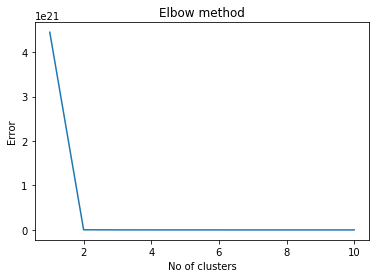

In [240]:
Error =[]
for i in range(1, 11):
    kmeans = KMeans(n_clusters = i)
    kmeans.fit(X)
    Error.append(kmeans.inertia_)
import matplotlib.pyplot as plt
plt.plot(range(1, 11), Error)
plt.title('Elbow method')
plt.xlabel('No of clusters')
plt.ylabel('Error')
plt.show()

Not surprising.



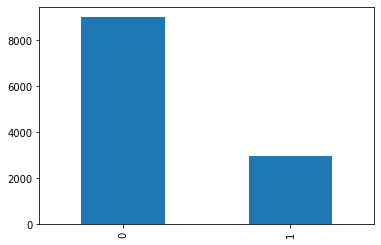

In [242]:
df_users['opted_in_to_mailing_list'].value_counts().plot(kind= 'bar')

In [247]:
df_users['opted_in_to_mailing_list'].value_counts()

0    9006
1    2994
Name: opted_in_to_mailing_list, dtype: int64

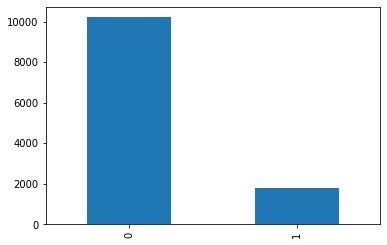

In [243]:
df_users['enabled_for_marketing_drip'].value_counts().plot(kind= 'bar')

In [246]:
df_users['enabled_for_marketing_drip'].value_counts()

0    10208
1     1792
Name: enabled_for_marketing_drip, dtype: int64

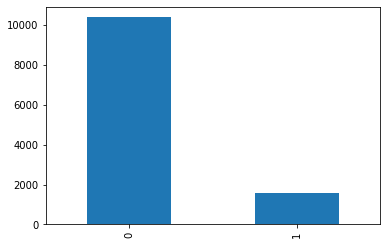

In [244]:
df_users['adopted'].value_counts().plot(kind='bar')

In [245]:
df_users['adopted'].value_counts()

0    10398
1     1602
Name: adopted, dtype: int64

Simple Relationships between mailing list, marketing drips, and user adoption (using 3 times in a week) might seem to be somewhat relational  Though the correlation appears to be essentially non-existent.  They all are a small portion of total signups. 

PCA Analysis


In [249]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
scaler.fit(df_users.drop(['object_id', 'adopted', 'name', 'email', 'creation_time'], axis = 1))



StandardScaler(copy=True, with_mean=True, with_std=True)

In [252]:
scaled_data = scaler.transform(df_users.drop(['object_id', 'adopted', 'name', 'email', 'creation_time'], axis = 1))

In [253]:
from sklearn.decomposition import PCA
pca = PCA(n_components=2)
pca.fit(scaled_data)

PCA(copy=True, iterated_power='auto', n_components=2, random_state=None,
    svd_solver='auto', tol=0.0, whiten=False)

In [254]:
x_pca = pca.transform(scaled_data)

In [255]:
scaled_data.shape

(12000, 10)

In [256]:
x_pca.shape

(12000, 2)

Text(0, 0.5, 'Second Principal Component')

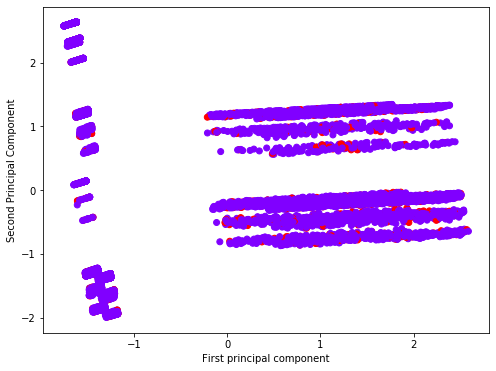

In [257]:
plt.figure(figsize=(8,6))
plt.scatter(x_pca[:,0],x_pca[:,1],c=df_users['adopted'],cmap='rainbow')
plt.xlabel('First principal component')
plt.ylabel('Second Principal Component')

Not what I wanted.  Not very helpful.

In [261]:
from sklearn.linear_model import RidgeCV, LassoCV, Ridge, Lasso

In [266]:
X = df_users.drop(['object_id', 'adopted', 'name', 'email', 'creation_time'], axis = 1)
y = df_users['adopted']
X

,last_session_creation_time,opted_in_to_mailing_list,enabled_for_marketing_drip,org_id,invited_by_user_id,creation_source_GUEST_INVITE,creation_source_ORG_INVITE,creation_source_PERSONAL_PROJECTS,creation_source_SIGNUP,creation_source_SIGNUP_GOOGLE_AUTH
0,1.398139e+09,1,0,11,10803.0,1,0,0,0,0
1,1.396238e+09,0,0,1,316.0,0,1,0,0,0
2,1.363735e+09,0,0,94,1525.0,0,1,0,0,0
3,1.369210e+09,0,0,1,5151.0,1,0,0,0,0
4,1.358850e+09,0,0,193,5240.0,1,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...
11995,1.378448e+09,0,0,89,8263.0,0,1,0,0,0
11996,1.358275e+09,0,0,200,0.0,0,0,0,0,1
11997,1.398603e+09,1,1,83,8074.0,1,0,0,0,0
11998,1.338638e+09,0,0,6,0.0,0,0,1,0,0


In [267]:
reg = LassoCV()
reg.fit(X,y)

print("best alpha using built-in LassoCV: %f" % reg.alpha_)
print("best score using built-in LassoCV: %f" %reg.score(X,y))

coef = pd.Series(reg.coef_, index = X.columns)

best alpha using built-in LassoCV: 2220.501562
best score using built-in LassoCV: 0.000115


In [268]:
print("Lasso picked " + str(sum(coef != 0)) + " variables and eliminated the other " +  str(sum(coef == 0)) + " variables")

Lasso picked 1 variables and eliminated the other 9 variables


Text(0.5, 1.0, 'Feature importance using Lasso Model')

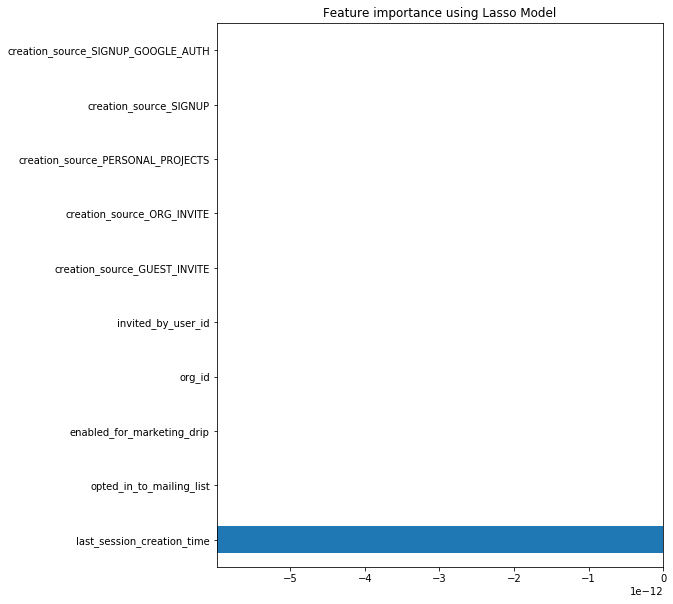

In [269]:
imp_coef = coef.sort_values()
import matplotlib
matplotlib.rcParams['figure.figsize'] = (8.0, 10.0)
imp_coef.plot(kind = "barh")
plt.title("Feature importance using Lasso Model")